In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [2]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [4]:
raw_path = '../input/brazilian-ecommerce/'

### 1. Business Case
Transaksi customer selalu berkurang setiap bulannya/ banyak customer yang sudah tidak transaksi lagi di e-commerce kita

Metodologi:
create a churn probability prediction using various models you have learned in class. What you should do:

- Create several machine learning models
- Compare these models based on performance level, don't forget to increase the performance level with - -hyperparameter tuning or other methods. 
- Decide which machine learning model the business should use to solve a business problem. 
- Create segmentation from the insights of the model that you choose to help the team make business decisions. 

## 2. Library

In [5]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [6]:
#ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## 3. Read Data

In [7]:
customers_dataset = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
order_items_dataset = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
geolocation_dataset = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
orders_dataset = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
products_dataset = pd.read_csv(raw_path + 'olist_products_dataset.csv')
order_payments_dataset = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
# order_customer_dataset = pd.read_csv(raw_path + 'olist_order_customer_dataset.csv')
sellers_dataset = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
order_reviews_dataset = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
product_category = pd.read_csv(raw_path + 'product_category_name_translation.csv')

In [8]:
#create dataset 
df = customers_dataset.merge(orders_dataset, how = 'left', on='customer_id')
df = df.merge(order_items_dataset, how = 'right', on='order_id')
df = df.merge(order_payments_dataset, how = 'inner', on='order_id')
df = df.merge(order_reviews_dataset[['order_id','review_score']], how='inner', on='order_id')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,5
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,4
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,5
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,4
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,5


### Column Description:

- customer_id :
- customer_unique_id : 


## 4. Data Wrangling

In [9]:
#check data
def missing_check(df):
    missing=df.isnull().sum()
    per_mis = 100*(missing/len(df))
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing" : missing,
                         "Percent_Missing" : per_mis,
                         "Data_Types" : data_type,
                         "Number_Unique" : number_unique
                        })
missing_check(df)

,Missing,Percent_Missing,Data_Types,Number_Unique
customer_id,0,0.000000,object,97916
customer_unique_id,0,0.000000,object,94720
customer_zip_code_prefix,0,0.000000,int64,14955
customer_city,0,0.000000,object,4108
customer_state,0,0.000000,object,27
order_id,0,0.000000,object,97916
order_status,0,0.000000,object,7
order_purchase_timestamp,0,0.000000,object,97370
order_approved_at,15,0.012785,object,89533
order_delivered_carrier_date,1235,1.052596,object,80449


In [10]:
#data shape
df.shape

(117329, 23)

In [11]:
#convert type data
df[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']] = \
df[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].astype('datetime64[ns]')

#covert to category
data1 = df.select_dtypes(exclude='object')
data2 = df.select_dtypes(include='object').apply(lambda x: x.astype('category'))

#concat data
df = pd.concat([data1,data2], axis =1)

In [12]:
df.head()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,product_id,seller_id,shipping_limit_date,payment_type
0,28013,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,58.90,13.29,1,2,72.19,5,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,delivered,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,credit_card
1,15775,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,239.90,19.93,1,3,259.83,4,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,delivered,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,credit_card
2,35661,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,199.00,17.87,1,5,216.87,5,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,000229ec398224ef6ca0657da4fc703e,delivered,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,credit_card
3,12952,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,12.99,12.79,1,2,25.78,4,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,delivered,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,credit_card
4,13226,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,199.90,18.14,1,3,218.04,5,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,credit_card


In [13]:
df.dtypes

customer_zip_code_prefix                  int64
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_installments                      int64
payment_value                           float64
review_score                              int64
customer_id                            category
customer_unique_id                     category
customer_city                          category
customer_state                         category
order_id                               category
order_status                           category
product_id                             category
seller_id                              c

### 4.1 Data Cleansing

In [14]:
#hanle missing value in date with ffill
df.fillna(method ='ffill', inplace = True)

In [15]:
df.isna().sum()

customer_zip_code_prefix         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
price                            0
freight_value                    0
payment_sequential               0
payment_installments             0
payment_value                    0
review_score                     0
customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
product_id                       0
seller_id                        0
shipping_limit_date              0
payment_type                     0
dtype: int64

## 5. Exploratory Data Analysis

In [16]:
df.head()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,product_id,seller_id,shipping_limit_date,payment_type
0,28013,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,58.90,13.29,1,2,72.19,5,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,delivered,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,credit_card
1,15775,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,239.90,19.93,1,3,259.83,4,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,delivered,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,credit_card
2,35661,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,199.00,17.87,1,5,216.87,5,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,000229ec398224ef6ca0657da4fc703e,delivered,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,credit_card
3,12952,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,12.99,12.79,1,2,25.78,4,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,delivered,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,credit_card
4,13226,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,199.90,18.14,1,3,218.04,5,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,credit_card


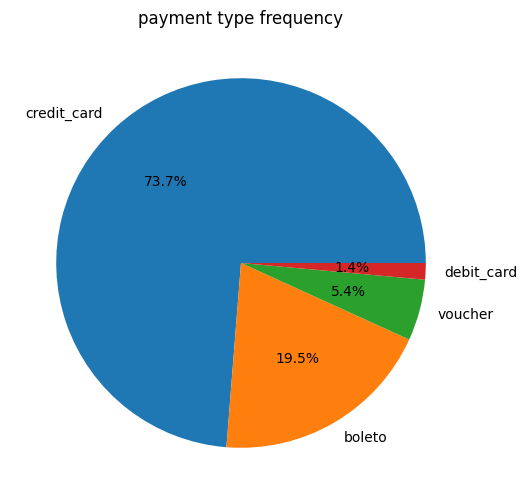

In [17]:
#payment method frequency

plt.figure(figsize=(8,6))
plt.pie(df["payment_type"].value_counts(),
        autopct="%1.1f%%",
        labels=df['payment_type'].value_counts().index)
plt.title("payment type frequency")
plt.show()

In [18]:
#freq of order status
df['order_status'].value_counts()

order_status
delivered      114859
shipped          1167
canceled          553
invoiced          370
processing        370
unavailable         7
approved            3
Name: count, dtype: int64

# Feature Engineering 

In [19]:
df_feature = df.copy()

In [20]:
df_feature = df_feature[['customer_unique_id','customer_id','order_approved_at','order_estimated_delivery_date','price','freight_value'\
                         ,'payment_sequential','payment_installments','order_id','product_id','payment_value','review_score','payment_type']]

In [21]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             117329 non-null  category      
 1   customer_id                    117329 non-null  category      
 2   order_approved_at              117329 non-null  datetime64[ns]
 3   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 4   price                          117329 non-null  float64       
 5   freight_value                  117329 non-null  float64       
 6   payment_sequential             117329 non-null  int64         
 7   payment_installments           117329 non-null  int64         
 8   order_id                       117329 non-null  category      
 9   product_id                     117329 non-null  category      
 10  payment_value                  117329 non-null  float64       
 11  

In [22]:
df_feature.head()

,customer_unique_id,customer_id,order_approved_at,order_estimated_delivery_date,price,freight_value,payment_sequential,payment_installments,order_id,product_id,payment_value,review_score,payment_type
0,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,2017-09-13 09:45:35,2017-09-29,58.90,13.29,1,2,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,72.19,5,credit_card
1,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 11:05:13,2017-05-15,239.90,19.93,1,3,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,259.83,4,credit_card
2,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:48:30,2018-02-05,199.00,17.87,1,5,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,216.87,5,credit_card
3,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:10:18,2018-08-20,12.99,12.79,1,2,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,25.78,4,credit_card
4,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 14:10:13,2017-03-17,199.90,18.14,1,3,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,218.04,5,credit_card


In [23]:
#create delta purchase
import datetime as dt
# df_feature['order_estimated_delivery_date'] = df_feature['order_estimated_delivery_date'].apply(lambda x : dt.datetime.strftime(x, '%Y-%m-%d'))
# df_feature['order_approved_at'] = df_feature['order_approved_at'].apply(lambda x : dt.datetime.strftime(x, '%Y-%m-%d'))
df_feature[['order_estimated_delivery_date','order_approved_at']] = df_feature[['order_estimated_delivery_date','order_approved_at']].astype('datetime64[ns]')
df_feature['delta_purchase'] = (df_feature['order_estimated_delivery_date'] - df_feature['order_approved_at']).dt.days

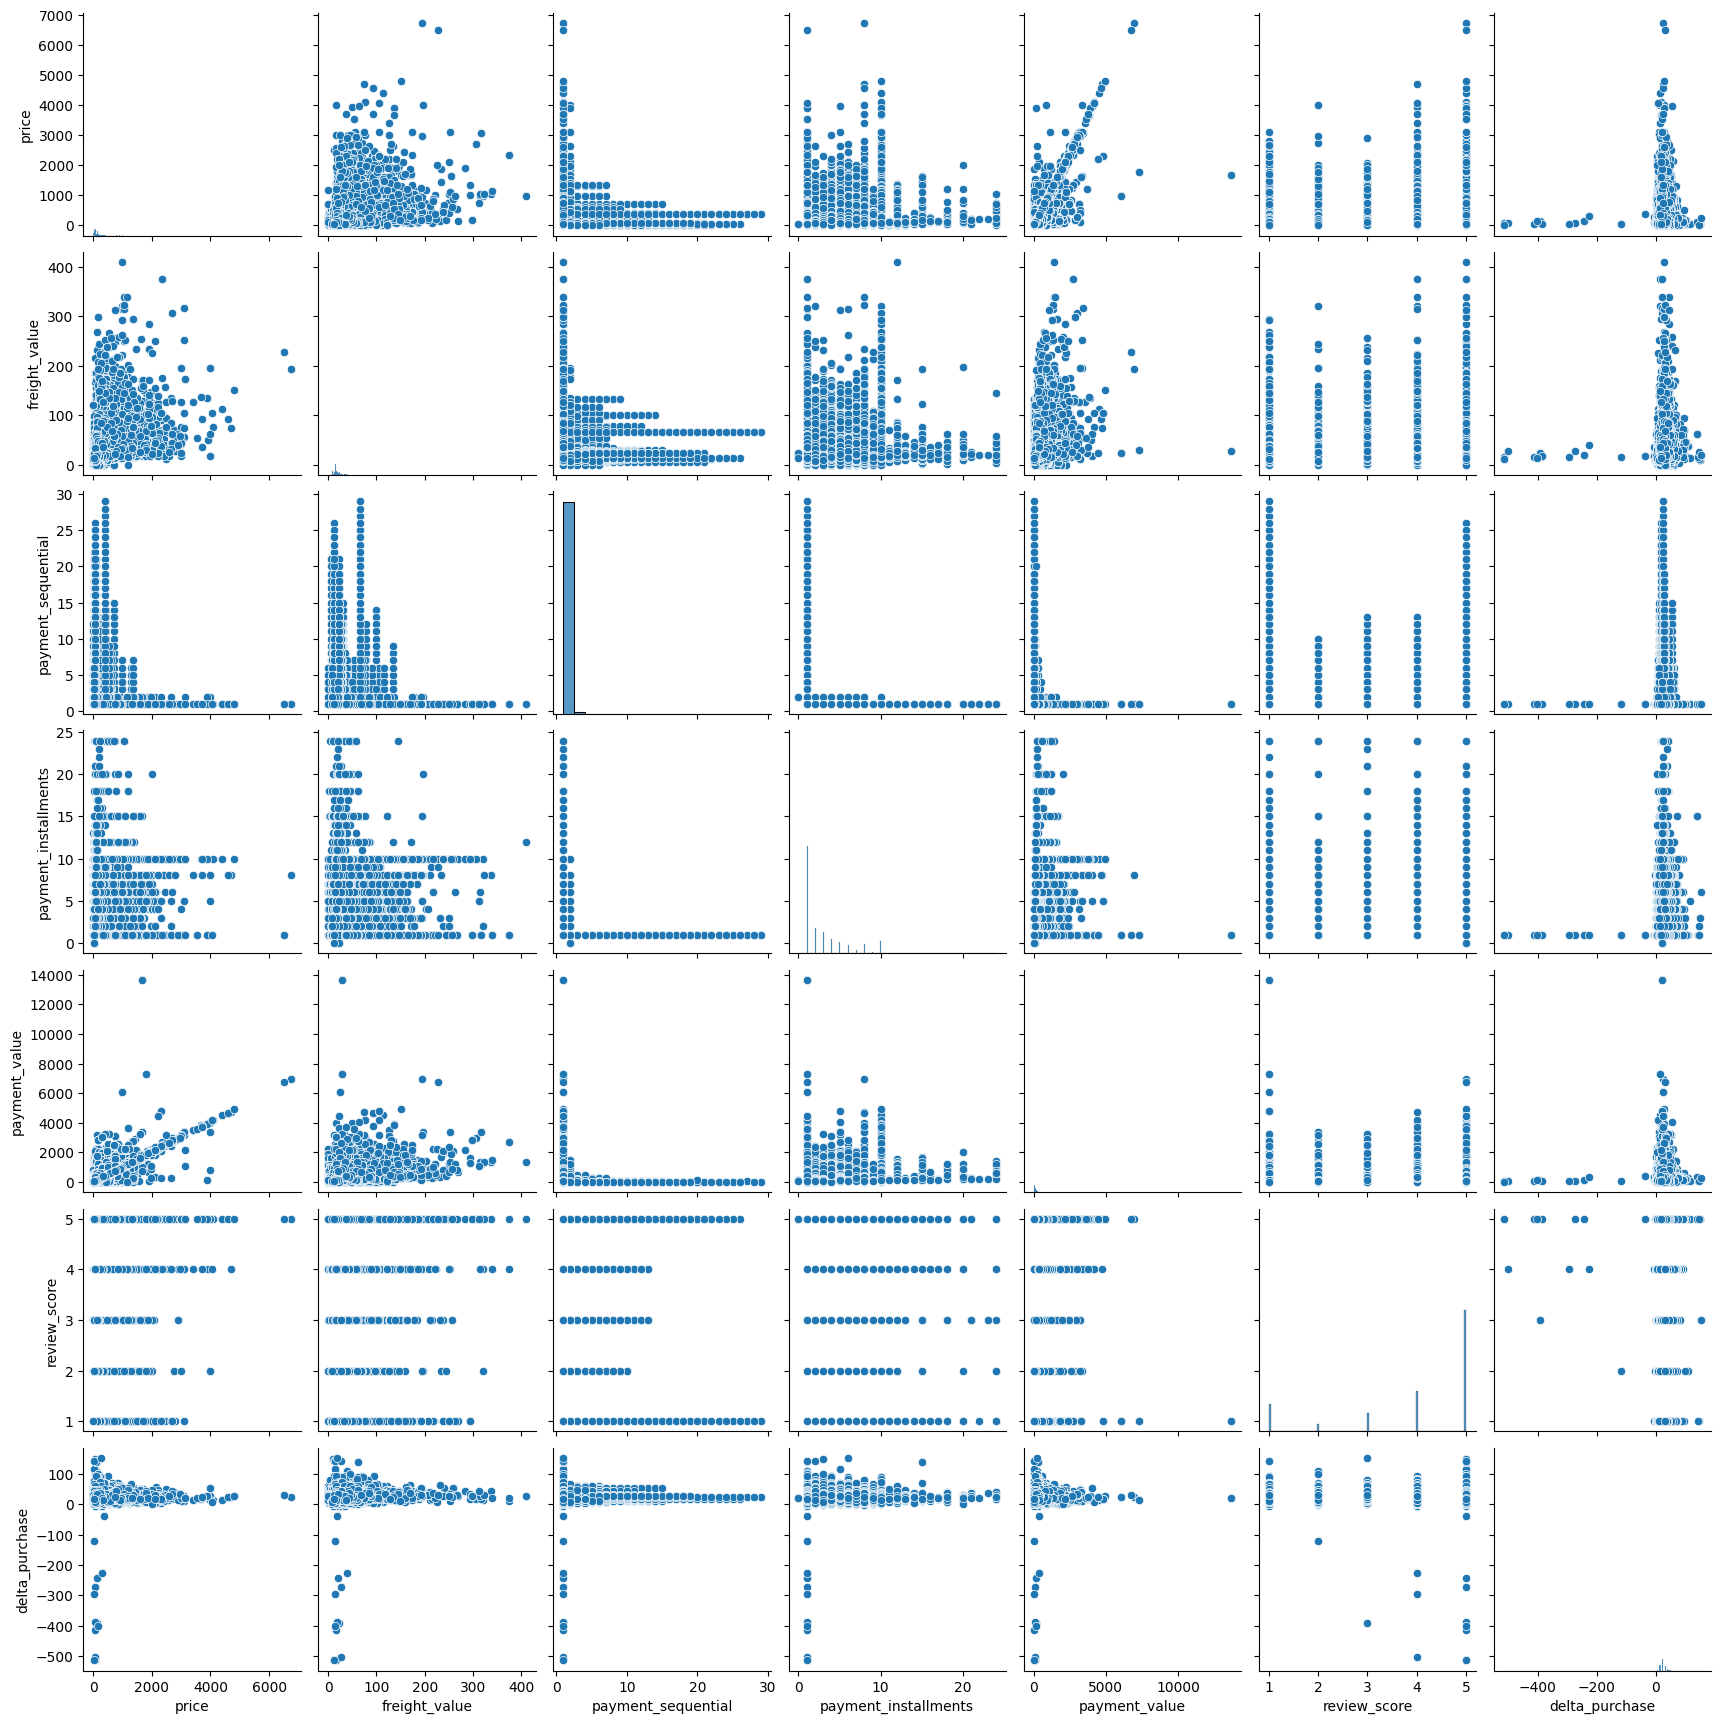

In [24]:
sns.pairplot(df_feature)

In [25]:
#add/create frequency trx
df_agg = df_feature.groupby(['customer_unique_id']).agg(
            freq_trx = pd.NamedAgg(column = 'customer_id', aggfunc='count'),
            avg_amount = pd.NamedAgg(column = 'price', aggfunc = 'mean'),
            total_amount = pd.NamedAgg(column = 'payment_value', aggfunc = sum),
            min_amount = pd.NamedAgg(column = 'payment_value', aggfunc = min),
            max_amount = pd.NamedAgg(column = 'payment_value', aggfunc = max),
            freight_max = pd.NamedAgg(column = 'freight_value', aggfunc = max),
            freight_min = pd.NamedAgg(column = 'freight_value', aggfunc = min),
            freight_avg = pd.NamedAgg(column = 'freight_value', aggfunc = 'mean'),
            avg_payment_seq = pd.NamedAgg(column = 'price', aggfunc = 'mean'),
            max_payment_seq = pd.NamedAgg(column = 'price', aggfunc = max),
            min_payment_seq = pd.NamedAgg(column = 'price', aggfunc = min),
            avg_review_score = pd.NamedAgg(column = 'review_score', aggfunc = 'mean'),
            delta_purchase = pd.NamedAgg(column = 'delta_purchase', aggfunc = 'mean'),
            first_purchase = pd.NamedAgg(column = 'order_approved_at', aggfunc = min),
            last_purchase = pd.NamedAgg(column = 'order_approved_at', aggfunc = max),
            payment_type = pd.NamedAgg(column = 'payment_type', aggfunc = 'nunique'),
            avg_payment_install = pd.NamedAgg(column = 'payment_installments', aggfunc = 'mean'),
            total_product = pd.NamedAgg(column = 'product_id', aggfunc = 'nunique')
                ).reset_index()

df_agg.head()

,customer_unique_id,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,first_purchase,last_purchase,payment_type,avg_payment_install,total_product
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,141.90,141.90,141.90,12.00,12.00,12.00,129.90,129.90,129.90,5.0,10.0,2018-05-10 11:11:18,2018-05-10 11:11:18,1,8.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,27.19,27.19,27.19,8.29,8.29,8.29,18.90,18.90,18.90,4.0,7.0,2018-05-07 18:25:44,2018-05-07 18:25:44,1,1.0,1
2,0000f46a3911fa3c0805444483337064,1,69.00,86.22,86.22,86.22,17.22,17.22,17.22,69.00,69.00,69.00,3.0,27.0,2017-03-10 21:05:03,2017-03-10 21:05:03,1,8.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,43.62,43.62,43.62,17.63,17.63,17.63,25.99,25.99,25.99,4.0,31.0,2017-10-12 20:49:17,2017-10-12 20:49:17,1,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,196.89,196.89,196.89,16.89,16.89,16.89,180.00,180.00,180.00,5.0,20.0,2017-11-14 20:06:52,2017-11-14 20:06:52,1,6.0,1


In [26]:
#add recency feature
df_recency = df_feature.groupby('customer_unique_id',as_index=False)['order_approved_at'].max()
df_recency.columns = ['customer_unique_id','last_purchase']
recent_date = df_recency['last_purchase'].max()
df_recency['recency'] = df_recency['last_purchase'].apply(lambda x: (recent_date - x).days)
df_recency

,customer_unique_id,last_purchase,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,292
...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,451
94716,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,266
94717,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,573
94718,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,124


In [27]:
#add recency to df_agg
df_agg = df_agg.merge(df_recency[['customer_unique_id','recency']], how='left', on='customer_unique_id')
#add basket size
df_agg['basket_size'] = df_agg['total_product']/df_agg['freq_trx']

In [28]:
#data fir customer segmentation
df_custseg = df_agg.copy()

# Customer Segmentation

Clustering adalah pengelompokan data berdasarkan karakteristiknya. Clustering bertujuan untuk menghasilkan cluster dimana:

- observasi di satu cluster yang sama memiliki karakteristik semirip mungkin
- observasi dari cluster berbeda memiliki karakteristik yang sebeda mungkin

### K-means Clustering 

K-means adalah salah satu algoritma clustering yang *centroid-based*, artinya tiap cluster memiliki satu centroid yang mewakili cluster tersebut.
Banyaknya cluster $k$ ditentukan oleh user.

In [29]:
df_custseg.head()

,customer_unique_id,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,first_purchase,last_purchase,payment_type,avg_payment_install,total_product,recency,basket_size
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,141.90,141.90,141.90,12.00,12.00,12.00,129.90,129.90,129.90,5.0,10.0,2018-05-10 11:11:18,2018-05-10 11:11:18,1,8.0,1,116,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,27.19,27.19,27.19,8.29,8.29,8.29,18.90,18.90,18.90,4.0,7.0,2018-05-07 18:25:44,2018-05-07 18:25:44,1,1.0,1,118,1.0
2,0000f46a3911fa3c0805444483337064,1,69.00,86.22,86.22,86.22,17.22,17.22,17.22,69.00,69.00,69.00,3.0,27.0,2017-03-10 21:05:03,2017-03-10 21:05:03,1,8.0,1,541,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,43.62,43.62,43.62,17.63,17.63,17.63,25.99,25.99,25.99,4.0,31.0,2017-10-12 20:49:17,2017-10-12 20:49:17,1,4.0,1,325,1.0
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,196.89,196.89,196.89,16.89,16.89,16.89,180.00,180.00,180.00,5.0,20.0,2017-11-14 20:06:52,2017-11-14 20:06:52,1,6.0,1,292,1.0


In [30]:
#exclude object dtype for builing model
df_custseg.dtypes

customer_unique_id           category
freq_trx                        int64
avg_amount                    float64
total_amount                  float64
min_amount                    float64
max_amount                    float64
freight_max                   float64
freight_min                   float64
freight_avg                   float64
avg_payment_seq               float64
max_payment_seq               float64
min_payment_seq               float64
avg_review_score              float64
delta_purchase                float64
first_purchase         datetime64[ns]
last_purchase          datetime64[ns]
payment_type                    int64
avg_payment_install           float64
total_product                   int64
recency                         int64
basket_size                   float64
dtype: object

In [31]:
df_custseg.shape

(94720, 21)

In [32]:
#check data
def missing_check(df):
    missing=df.isnull().sum()
    per_mis = 100*(missing/len(df))
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing" : missing,
                         "Percent_Missing" : per_mis,
                         "Data_Types" : data_type,
                         "Number_Unique" : number_unique
                        })
missing_check(df_custseg)

,Missing,Percent_Missing,Data_Types,Number_Unique
customer_unique_id,0,0.0,category,94720
freq_trx,0,0.0,int64,27
avg_amount,0,0.0,float64,8297
total_amount,0,0.0,float64,30773
min_amount,0,0.0,float64,27521
max_amount,0,0.0,float64,27281
freight_max,0,0.0,float64,6515
freight_min,0,0.0,float64,6768
freight_avg,0,0.0,float64,8759
avg_payment_seq,0,0.0,float64,8297


In [33]:
df_custseg.iloc[ : ,1:19]

,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,first_purchase,last_purchase,payment_type,avg_payment_install,total_product
0,1,129.90,141.90,141.90,141.90,12.00,12.00,12.00,129.90,129.90,129.90,5.0,10.0,2018-05-10 11:11:18,2018-05-10 11:11:18,1,8.0,1
1,1,18.90,27.19,27.19,27.19,8.29,8.29,8.29,18.90,18.90,18.90,4.0,7.0,2018-05-07 18:25:44,2018-05-07 18:25:44,1,1.0,1
2,1,69.00,86.22,86.22,86.22,17.22,17.22,17.22,69.00,69.00,69.00,3.0,27.0,2017-03-10 21:05:03,2017-03-10 21:05:03,1,8.0,1
3,1,25.99,43.62,43.62,43.62,17.63,17.63,17.63,25.99,25.99,25.99,4.0,31.0,2017-10-12 20:49:17,2017-10-12 20:49:17,1,4.0,1
4,1,180.00,196.89,196.89,196.89,16.89,16.89,16.89,180.00,180.00,180.00,5.0,20.0,2017-11-14 20:06:52,2017-11-14 20:06:52,1,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94715,2,785.00,4134.84,2067.42,2067.42,258.28,239.14,248.71,785.00,890.00,680.00,5.0,54.0,2017-06-08 21:15:16,2017-06-08 21:15:16,1,10.0,2
94716,1,64.89,84.58,84.58,84.58,19.69,19.69,19.69,64.89,64.89,64.89,4.0,32.0,2017-12-10 20:16:20,2017-12-10 20:16:20,1,1.0,1
94717,1,89.90,112.46,112.46,112.46,22.56,22.56,22.56,89.90,89.90,89.90,5.0,44.0,2017-02-07 16:02:44,2017-02-07 16:02:44,1,1.0,1
94718,1,115.00,133.69,133.69,133.69,18.69,18.69,18.69,115.00,115.00,115.00,5.0,25.0,2018-05-02 15:58:47,2018-05-02 15:58:47,1,5.0,1


In [34]:
#separate object with integer/float value and dummy variabel
df_id = df_custseg.iloc[:,0:1]
df_feature = df_custseg.iloc[ : ,1:19]

In [43]:
df_feature

,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,payment_type,avg_payment_install,total_product
0,1,129.90,141.90,141.90,141.90,12.00,12.00,12.00,129.90,129.90,129.90,5.0,10.0,1,8.0,1
1,1,18.90,27.19,27.19,27.19,8.29,8.29,8.29,18.90,18.90,18.90,4.0,7.0,1,1.0,1
2,1,69.00,86.22,86.22,86.22,17.22,17.22,17.22,69.00,69.00,69.00,3.0,27.0,1,8.0,1
3,1,25.99,43.62,43.62,43.62,17.63,17.63,17.63,25.99,25.99,25.99,4.0,31.0,1,4.0,1
4,1,180.00,196.89,196.89,196.89,16.89,16.89,16.89,180.00,180.00,180.00,5.0,20.0,1,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94715,2,785.00,4134.84,2067.42,2067.42,258.28,239.14,248.71,785.00,890.00,680.00,5.0,54.0,1,10.0,2
94716,1,64.89,84.58,84.58,84.58,19.69,19.69,19.69,64.89,64.89,64.89,4.0,32.0,1,1.0,1
94717,1,89.90,112.46,112.46,112.46,22.56,22.56,22.56,89.90,89.90,89.90,5.0,44.0,1,1.0,1
94718,1,115.00,133.69,133.69,133.69,18.69,18.69,18.69,115.00,115.00,115.00,5.0,25.0,1,5.0,1


## Why Error?

In [47]:
df_feature 

,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,payment_type,avg_payment_install,total_product
0,1,129.90,141.90,141.90,141.90,12.00,12.00,12.00,129.90,129.90,129.90,5.0,10.0,1,8.0,1
1,1,18.90,27.19,27.19,27.19,8.29,8.29,8.29,18.90,18.90,18.90,4.0,7.0,1,1.0,1
2,1,69.00,86.22,86.22,86.22,17.22,17.22,17.22,69.00,69.00,69.00,3.0,27.0,1,8.0,1
3,1,25.99,43.62,43.62,43.62,17.63,17.63,17.63,25.99,25.99,25.99,4.0,31.0,1,4.0,1
4,1,180.00,196.89,196.89,196.89,16.89,16.89,16.89,180.00,180.00,180.00,5.0,20.0,1,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94715,2,785.00,4134.84,2067.42,2067.42,258.28,239.14,248.71,785.00,890.00,680.00,5.0,54.0,1,10.0,2
94716,1,64.89,84.58,84.58,84.58,19.69,19.69,19.69,64.89,64.89,64.89,4.0,32.0,1,1.0,1
94717,1,89.90,112.46,112.46,112.46,22.56,22.56,22.56,89.90,89.90,89.90,5.0,44.0,1,1.0,1
94718,1,115.00,133.69,133.69,133.69,18.69,18.69,18.69,115.00,115.00,115.00,5.0,25.0,1,5.0,1


In [49]:
#scale using scaler to normalize data
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df_feature), columns=df_feature.columns)

- n_init = the number of times the k-means algorithm will be run with different initial centeroid
- n_cluster = output for cluster
- init = method algorithm
- max_iter = partition of iteration
- random_state = default of random value 

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [50]:
#train the cluster
from sklearn.cluster import KMeans
X1 = df_std.values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=500, 
                        random_state= 111) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

<Axes: xlabel='k', ylabel='centeroid_distance'>

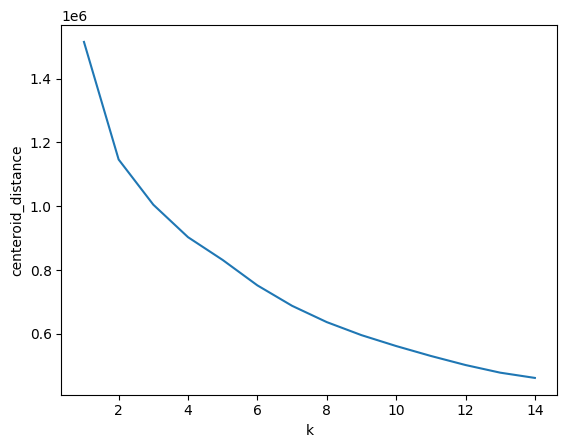

In [51]:
#plot the elbow
line_test = pd.DataFrame(inertia)
line_test.columns = ['centeroid_distance']
line_test['k'] = [k for k in range(1, 15)]
sns.lineplot(data=line_test, x='k', y='centeroid_distance')

In [ ]:
line_test

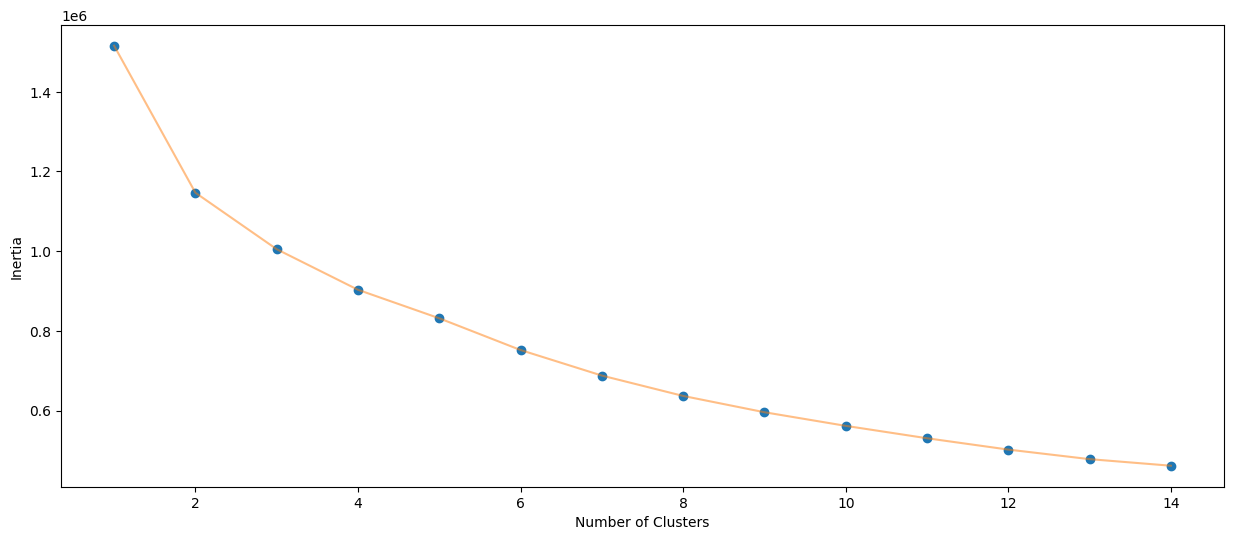

In [52]:
#plot the elbow
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [54]:
# train the model with the determined cluster

algorithm = (KMeans(n_clusters = 6 ,init='k-means++' ,max_iter=300, 
                        random_state= 111 ) )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [55]:
df_feature.head()

,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,payment_type,avg_payment_install,total_product
0,1,129.90,141.90,141.90,141.90,12.00,12.00,12.00,129.90,129.90,129.90,5.0,10.0,1,8.0,1
1,1,18.90,27.19,27.19,27.19,8.29,8.29,8.29,18.90,18.90,18.90,4.0,7.0,1,1.0,1
2,1,69.00,86.22,86.22,86.22,17.22,17.22,17.22,69.00,69.00,69.00,3.0,27.0,1,8.0,1
3,1,25.99,43.62,43.62,43.62,17.63,17.63,17.63,25.99,25.99,25.99,4.0,31.0,1,4.0,1
4,1,180.00,196.89,196.89,196.89,16.89,16.89,16.89,180.00,180.00,180.00,5.0,20.0,1,6.0,1


In [56]:
pd.DataFrame(centroids1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.976164,-0.218211,0.723591,0.106907,0.264755,0.080758,-0.388346,-0.156040,-0.218211,-0.094506,-0.327599,-0.335361,0.089583,-0.137693,0.321874,3.278655
1,-0.035888,8.087162,3.594521,7.612799,7.662820,3.023614,3.083779,3.083004,8.087162,8.035221,8.083149,-0.112571,0.266376,-0.068919,1.402531,-0.154086
2,-0.076284,2.228361,0.955779,2.232494,2.225354,2.224990,2.238004,2.252381,2.228361,2.221377,2.216787,-0.086232,0.315605,-0.122353,1.068424,-0.135563
3,1.781763,-0.121898,-0.033225,-0.554447,-0.242706,-0.015484,-0.081562,-0.051130,-0.121898,-0.093948,-0.147120,0.007044,0.062353,6.083575,-0.484826,0.399273
4,-0.176536,-0.312032,-0.183708,-0.321533,-0.338794,-0.347251,-0.319916,-0.336663,-0.312032,-0.318429,-0.303998,0.055945,-0.195555,-0.163270,-0.373048,-0.216695
5,-0.176410,0.268040,0.047969,0.275795,0.250538,0.428095,0.469772,0.453425,0.268040,0.255438,0.277487,-0.051631,0.429418,-0.163270,0.740267,-0.216272


In [57]:
pd.DataFrame(labels1)

,0
0,4
1,4
2,5
3,4
4,5
...,...
94715,1
94716,4
94717,4
94718,5


In [58]:
df_custseg

,customer_unique_id,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,first_purchase,last_purchase,payment_type,avg_payment_install,total_product,recency,basket_size
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,141.90,141.90,141.90,12.00,12.00,12.00,129.90,129.90,129.90,5.0,10.0,2018-05-10 11:11:18,2018-05-10 11:11:18,1,8.0,1,116,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,27.19,27.19,27.19,8.29,8.29,8.29,18.90,18.90,18.90,4.0,7.0,2018-05-07 18:25:44,2018-05-07 18:25:44,1,1.0,1,118,1.0
2,0000f46a3911fa3c0805444483337064,1,69.00,86.22,86.22,86.22,17.22,17.22,17.22,69.00,69.00,69.00,3.0,27.0,2017-03-10 21:05:03,2017-03-10 21:05:03,1,8.0,1,541,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,43.62,43.62,43.62,17.63,17.63,17.63,25.99,25.99,25.99,4.0,31.0,2017-10-12 20:49:17,2017-10-12 20:49:17,1,4.0,1,325,1.0
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,196.89,196.89,196.89,16.89,16.89,16.89,180.00,180.00,180.00,5.0,20.0,2017-11-14 20:06:52,2017-11-14 20:06:52,1,6.0,1,292,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2,785.00,4134.84,2067.42,2067.42,258.28,239.14,248.71,785.00,890.00,680.00,5.0,54.0,2017-06-08 21:15:16,2017-06-08 21:15:16,1,10.0,2,451,1.0
94716,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,84.58,84.58,84.58,19.69,19.69,19.69,64.89,64.89,64.89,4.0,32.0,2017-12-10 20:16:20,2017-12-10 20:16:20,1,1.0,1,266,1.0
94717,ffff371b4d645b6ecea244b27531430a,1,89.90,112.46,112.46,112.46,22.56,22.56,22.56,89.90,89.90,89.90,5.0,44.0,2017-02-07 16:02:44,2017-02-07 16:02:44,1,1.0,1,573,1.0
94718,ffff5962728ec6157033ef9805bacc48,1,115.00,133.69,133.69,133.69,18.69,18.69,18.69,115.00,115.00,115.00,5.0,25.0,2018-05-02 15:58:47,2018-05-02 15:58:47,1,5.0,1,124,1.0


In [59]:
df_custseg['cluster'] = labels1
df_custseg.head()

,customer_unique_id,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,first_purchase,last_purchase,payment_type,avg_payment_install,total_product,recency,basket_size,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,141.90,141.90,141.90,12.00,12.00,12.00,129.90,129.90,129.90,5.0,10.0,2018-05-10 11:11:18,2018-05-10 11:11:18,1,8.0,1,116,1.0,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,27.19,27.19,27.19,8.29,8.29,8.29,18.90,18.90,18.90,4.0,7.0,2018-05-07 18:25:44,2018-05-07 18:25:44,1,1.0,1,118,1.0,4
2,0000f46a3911fa3c0805444483337064,1,69.00,86.22,86.22,86.22,17.22,17.22,17.22,69.00,69.00,69.00,3.0,27.0,2017-03-10 21:05:03,2017-03-10 21:05:03,1,8.0,1,541,1.0,5
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,43.62,43.62,43.62,17.63,17.63,17.63,25.99,25.99,25.99,4.0,31.0,2017-10-12 20:49:17,2017-10-12 20:49:17,1,4.0,1,325,1.0,4
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,196.89,196.89,196.89,16.89,16.89,16.89,180.00,180.00,180.00,5.0,20.0,2017-11-14 20:06:52,2017-11-14 20:06:52,1,6.0,1,292,1.0,5


In [60]:
df_normalize = df_std.copy()
df_normalize['cluster'] = labels1
df_normalize.groupby('cluster').mean()

,freq_trx,avg_amount,total_amount,min_amount,max_amount,freight_max,freight_min,freight_avg,avg_payment_seq,max_payment_seq,min_payment_seq,avg_review_score,delta_purchase,payment_type,avg_payment_install,total_product
cluster,,,,,,,,,,,,,,,,
0,1.976164,-0.218211,0.723591,0.106907,0.264755,0.080758,-0.388346,-0.156040,-0.218211,-0.094506,-0.327599,-0.335361,0.089583,-0.137693,0.321874,3.278655
1,-0.036260,8.082648,3.591425,7.608510,7.658306,3.025811,3.086066,3.085268,8.082648,8.030688,8.078675,-0.111374,0.266154,-0.069062,1.404427,-0.154181
2,-0.076336,2.227129,0.955299,2.231303,2.224168,2.224032,2.237043,2.251413,2.227129,2.220152,2.215558,-0.086803,0.315530,-0.122364,1.067690,-0.135584
3,1.781763,-0.121898,-0.033225,-0.554447,-0.242706,-0.015484,-0.081562,-0.051130,-0.121898,-0.093948,-0.147120,0.007044,0.062353,6.083575,-0.484826,0.399273
4,-0.176502,-0.312218,-0.183771,-0.321717,-0.338974,-0.347462,-0.320131,-0.336878,-0.312218,-0.318613,-0.304185,0.055962,-0.195987,-0.163270,-0.373523,-0.216695
5,-0.176491,0.267367,0.047681,0.275091,0.249841,0.427119,0.468779,0.452430,0.267367,0.254771,0.276811,-0.051409,0.429430,-0.163270,0.739482,-0.216273


freq_trx                  Axes(0.125,0.814746;0.065678x0.0652542)
avg_amount             Axes(0.203814,0.814746;0.065678x0.0652542)
total_amount           Axes(0.282627,0.814746;0.065678x0.0652542)
min_amount             Axes(0.361441,0.814746;0.065678x0.0652542)
max_amount             Axes(0.440254,0.814746;0.065678x0.0652542)
freight_max            Axes(0.519068,0.814746;0.065678x0.0652542)
freight_min            Axes(0.597881,0.814746;0.065678x0.0652542)
freight_avg            Axes(0.676695,0.814746;0.065678x0.0652542)
avg_payment_seq        Axes(0.755508,0.814746;0.065678x0.0652542)
max_payment_seq        Axes(0.834322,0.814746;0.065678x0.0652542)
min_payment_seq           Axes(0.125,0.736441;0.065678x0.0652542)
avg_review_score       Axes(0.203814,0.736441;0.065678x0.0652542)
delta_purchase         Axes(0.282627,0.736441;0.065678x0.0652542)
payment_type           Axes(0.361441,0.736441;0.065678x0.0652542)
avg_payment_install    Axes(0.440254,0.736441;0.065678x0.0652542)
total_prod

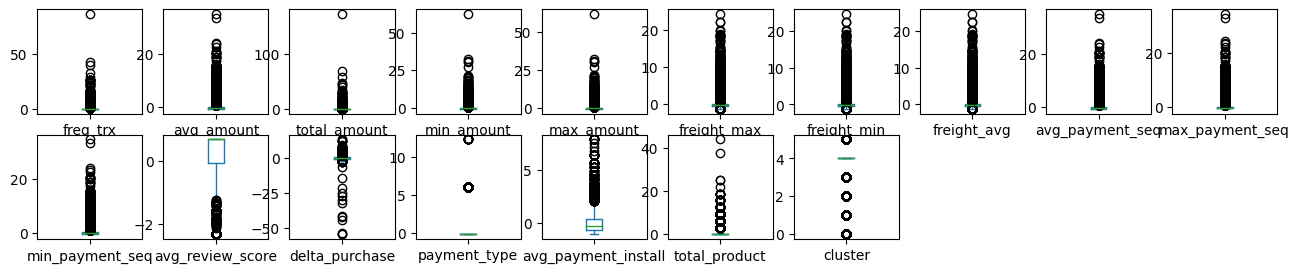

In [61]:
df_normalize.plot(kind="box", subplots=True, layout = (10,10),figsize=(16,16))

In [62]:
# #groupby and get mean for each feature for interpretation(behaviour)
# df_custseg.groupby('cluster').mean()

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [63]:
df_custseg[['cluster','freq_trx','avg_amount','total_amount']].groupby('cluster').mean()

,freq_trx,avg_amount,total_amount
cluster,,,
0,2.917416,84.787187,669.090206
1,1.207891,1665.374206,2476.201715
2,1.173847,550.410527,815.096062
3,2.752275,103.126446,192.196307
4,1.088757,66.887174,97.332670
5,1.088767,177.247286,243.178112
